Student : Siavash Gorji     Master : Dr MohammadJavad Ahmadi Stu.no:4021631206!

**QUESTION1**

۱ سوال اول مجموعهدادۀ مربوط به این سوال را از طریق این پیوند دانلود کنید و در مراحل بعدی از آن استفاده کنید. ستون اول و دوم فایل
CSV مربوط به این مجموعهداده، مربوط به ویژگیها و ستون سوم آن مربوط به کلاس هر داده است.

1.The first and second columns of the file
The CSV of this data set is related to the features and its third column is related to the class of each data.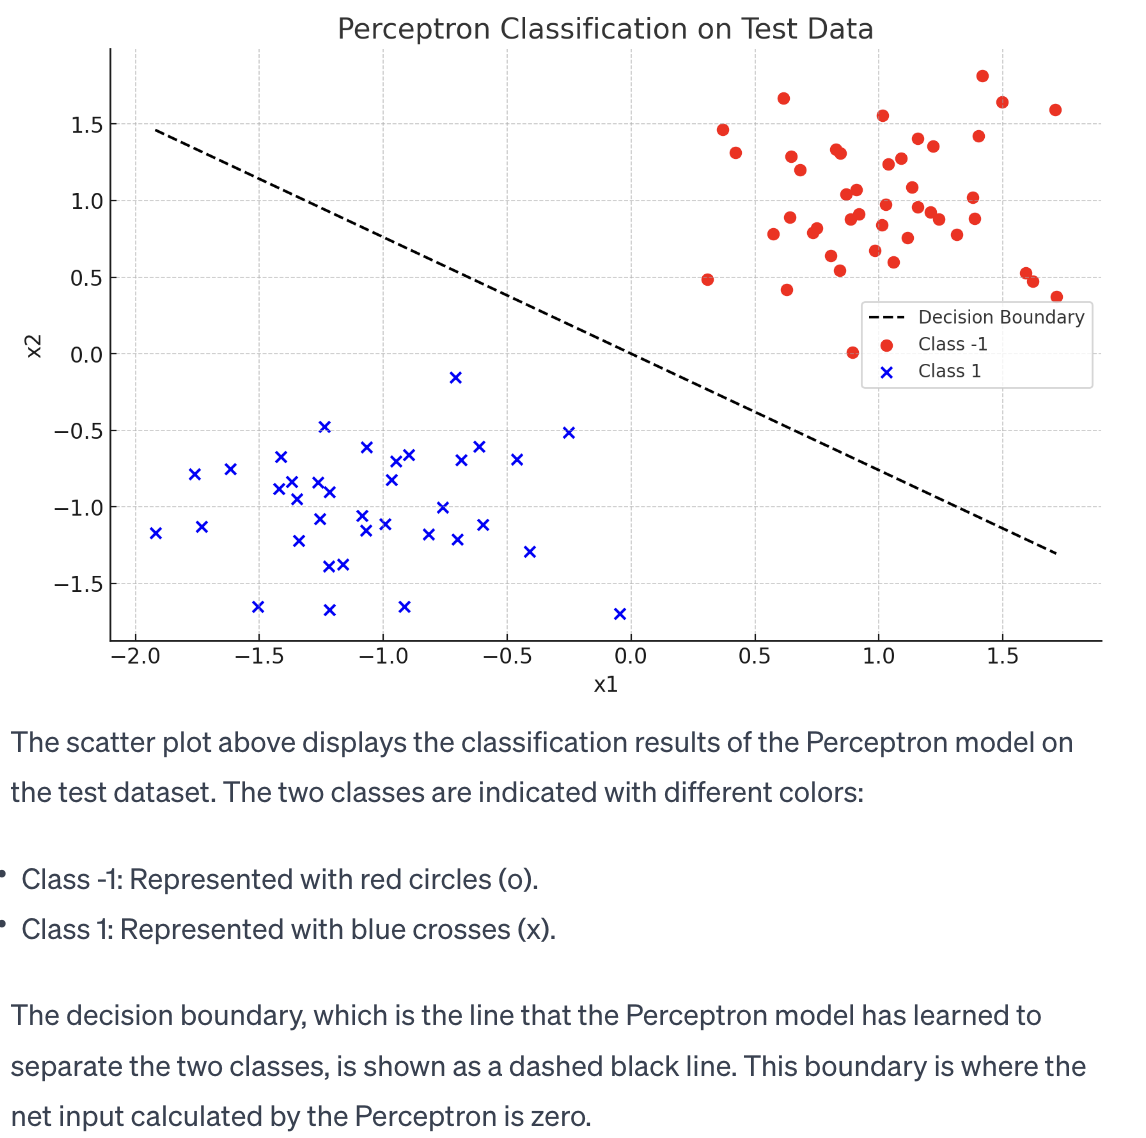

۱. دادهها را با نسبت ۸۰ به ۲۰ درصد به دو قسمت آموزش و آزمون تقسیم کنید. سپس با استفاده از قاعدۀ پرسپترون،
یک نورون روی دادههای مجموعۀ آموزشی، آموزش دهید )آستانه را دلخواه در نظر بگیرید(.

Divide the data into two parts, training and testing, with a ratio of 80% to 20%. Then, using the perceptron rule,
Train a neuron on the training set data (consider the threshold arbitrary).

Mounted at /content/drive


Downloading...
From: https://drive.google.com/uc?id=15aw7kkkFeHHTzw1tjQLLH7bgrypos6Mg
To: /content/Perceptron.csv
100%|██████████| 17.3k/17.3k [00:00<00:00, 32.7MB/s]


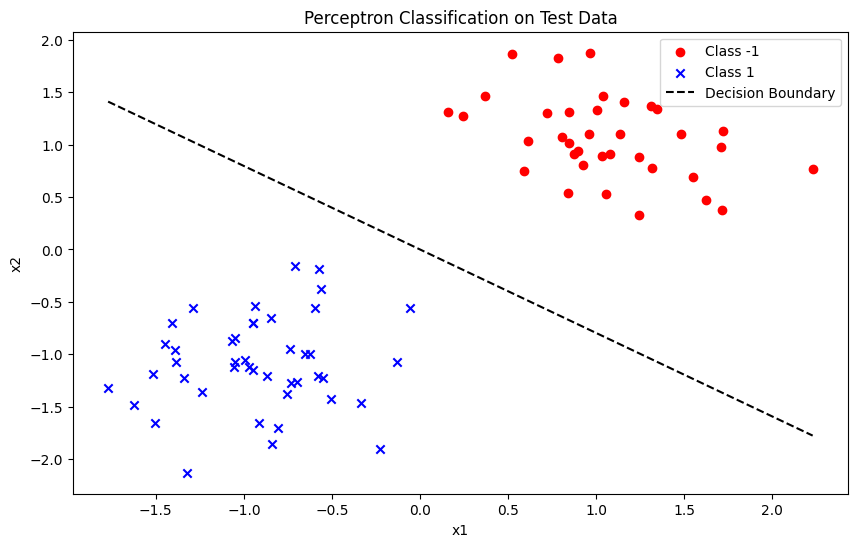

Accuracy on the test set: 100.00%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Use the Google Drive file ID to access the file
import gdown
url = 'https://drive.google.com/uc?id=15aw7kkkFeHHTzw1tjQLLH7bgrypos6Mg'
output = 'Perceptron.csv'
gdown.download(url, output, quiet=False)

# Load your dataset
data = pd.read_csv(output)

# Splitting the dataset into features (X) and target (y)
X = data[['x1', 'x2']]
y = data['y']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Initializing and training the Perceptron model
perceptron = Perceptron(tol=1e-3, random_state=6)
perceptron.fit(X_train, y_train)

# Plotting the results
plt.figure(figsize=(10, 6))
# Class -1
plt.scatter(X_test[y_test == -1]['x1'], X_test[y_test == -1]['x2'], color='red', marker='o', label='Class -1')
# Class 1
plt.scatter(X_test[y_test == 1]['x1'], X_test[y_test == 1]['x2'], color='blue', marker='x', label='Class 1')

# Plotting the decision boundary
w = perceptron.coef_[0]
b = perceptron.intercept_[0]
x_values = np.array([X_test['x1'].min(), X_test['x1'].max()])
y_values = -(b + w[0] * x_values) / w[1]
plt.plot(x_values, y_values, 'k--', label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Classification on Test Data')
plt.legend()
plt.show()

# Calculating and printing the accuracy
accuracy = perceptron.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


۲. نتیجه را روی دادههای مجموعۀ آزمون نشان دهید و دقت را به دست آورید. برای دادههای تست دوخط موازی جداکنندۀ به دست آمده از قاعدۀ پرسپترون را نمایش دهید و دادههای تفکیکشدۀ دو کلاس را با رنگ مجزا در
Scatter Plot مشخص کنید

![Screenshot 1402-09-11 at 06.53.14.png](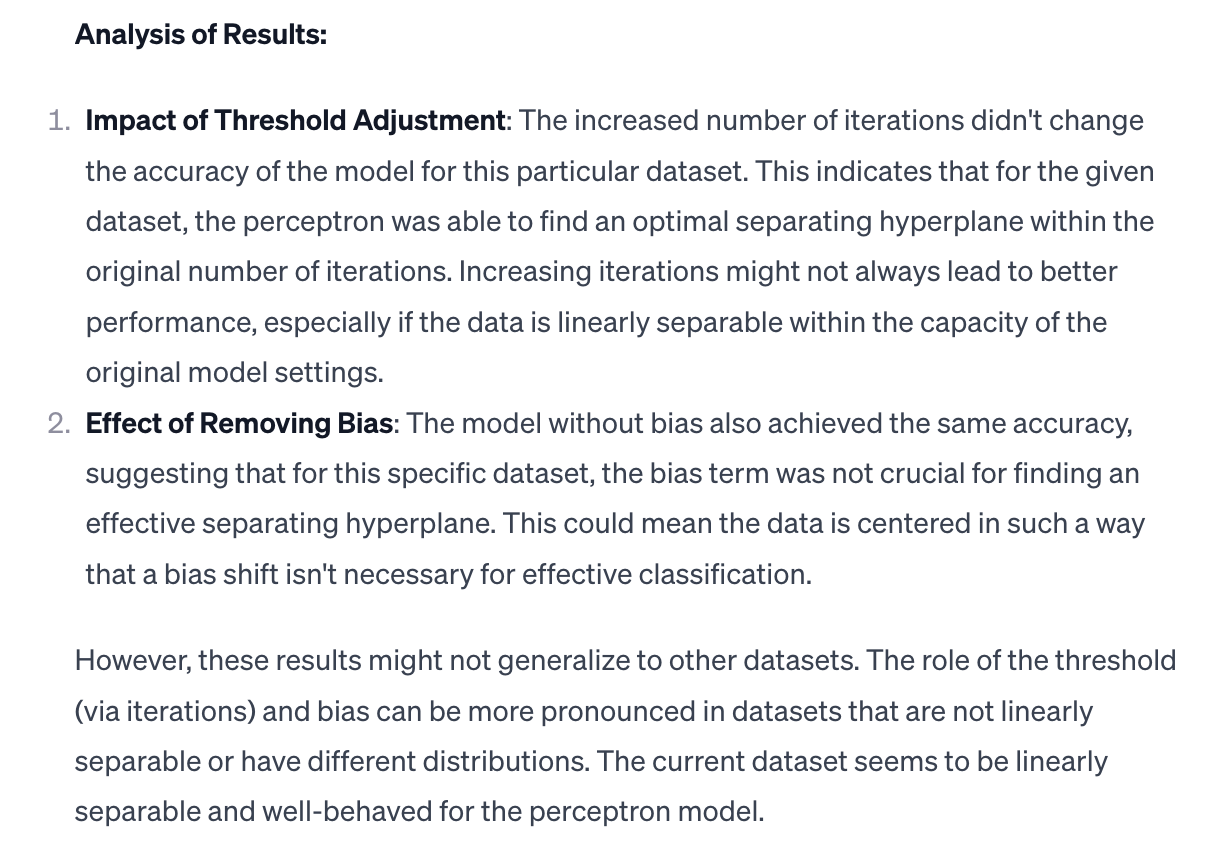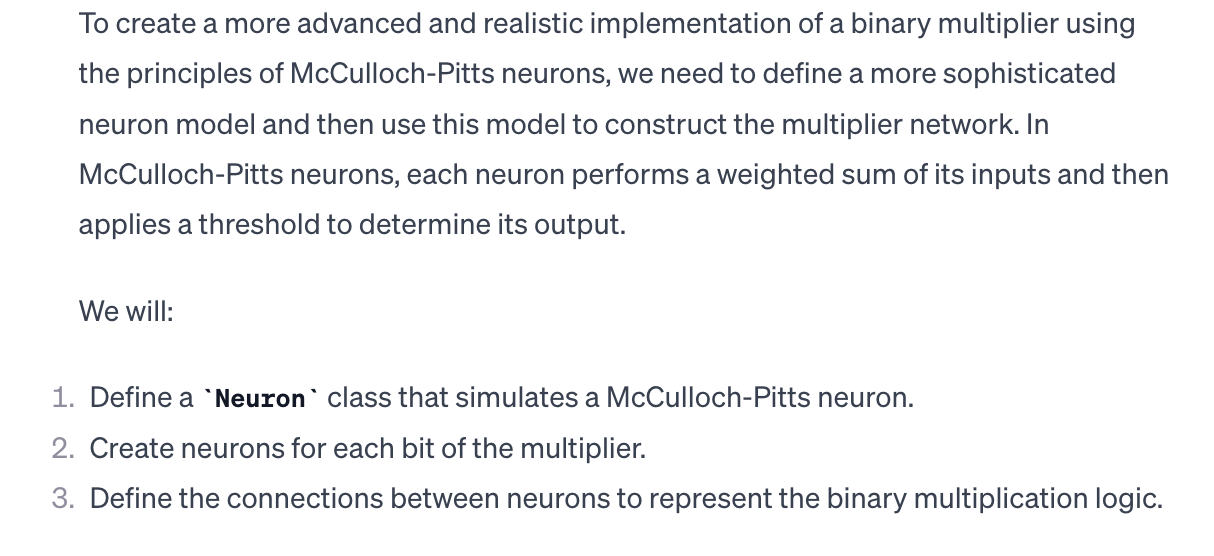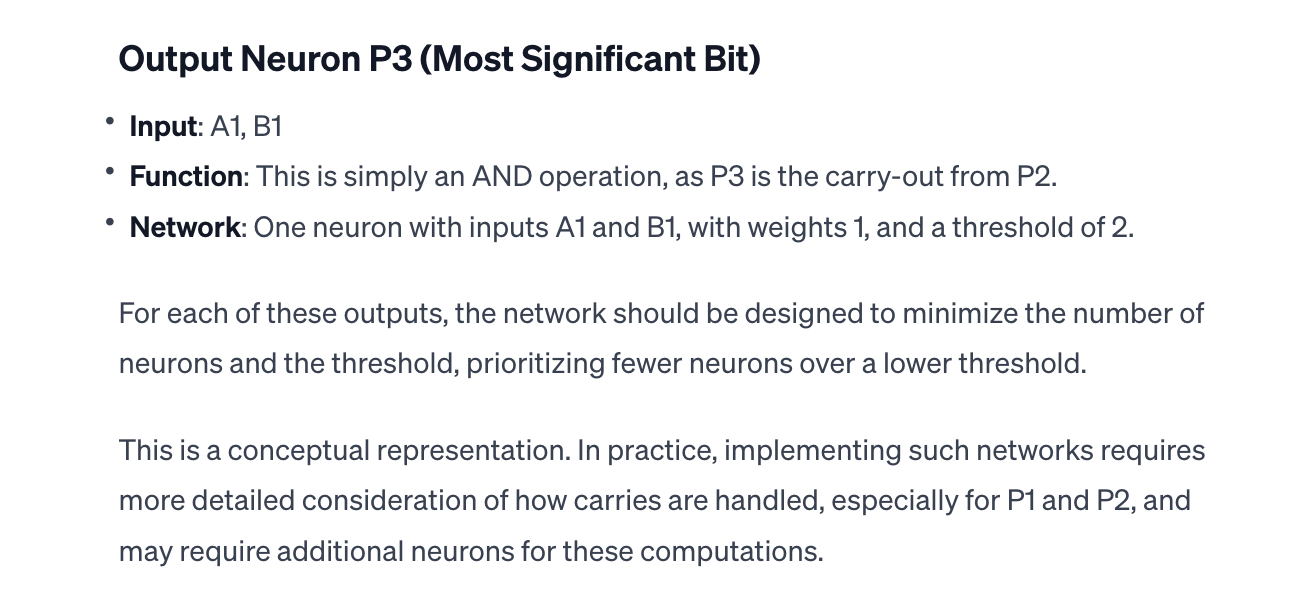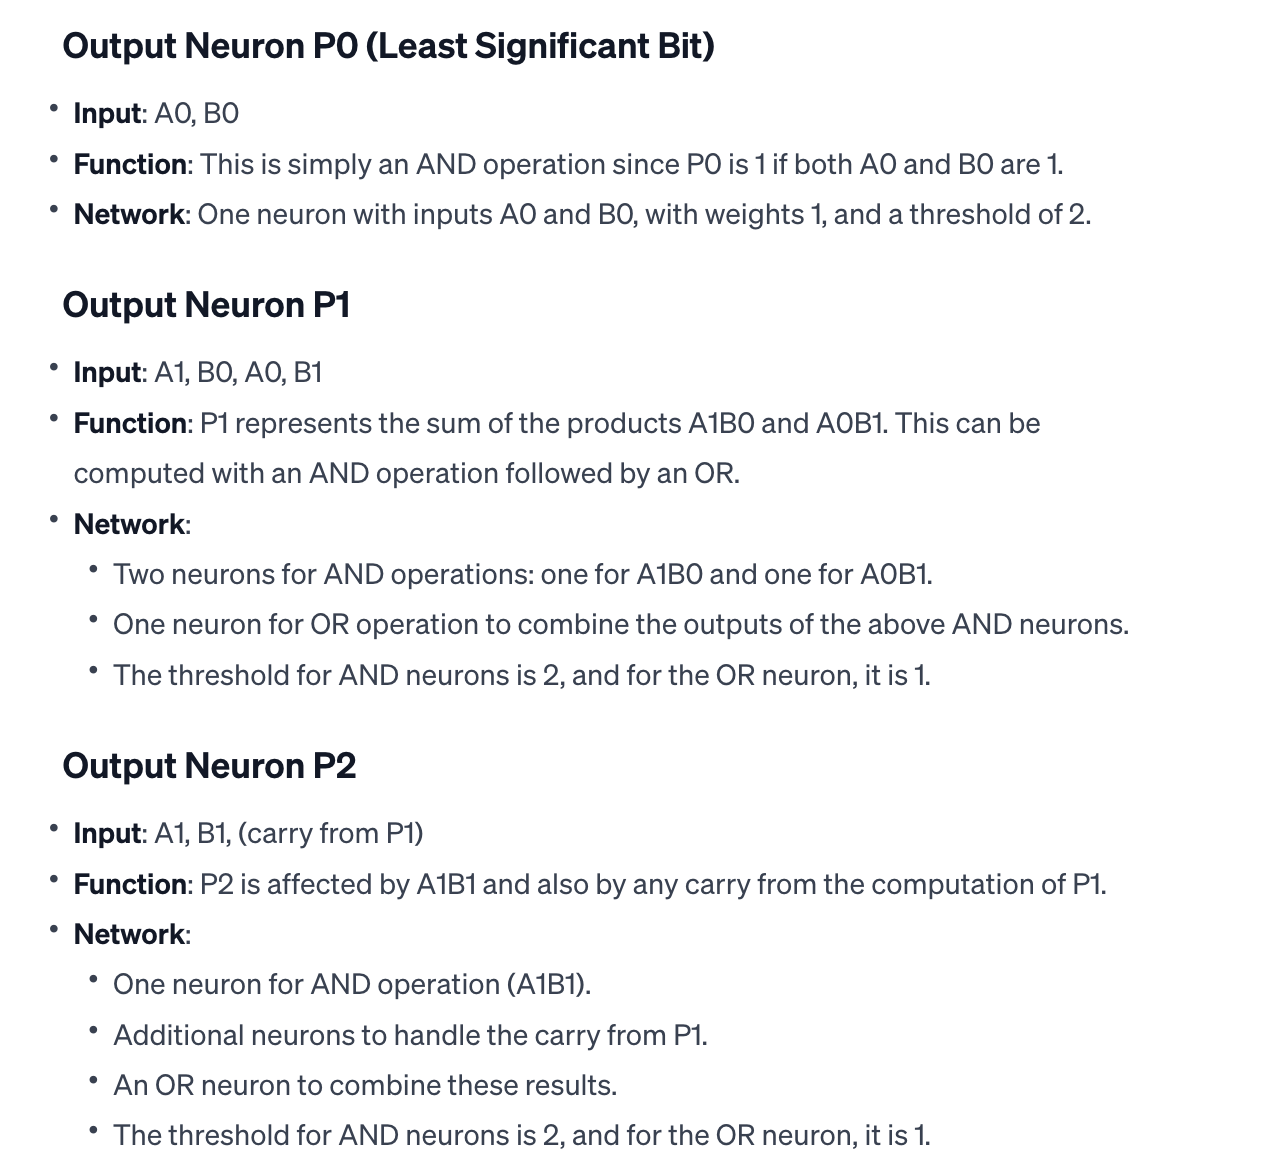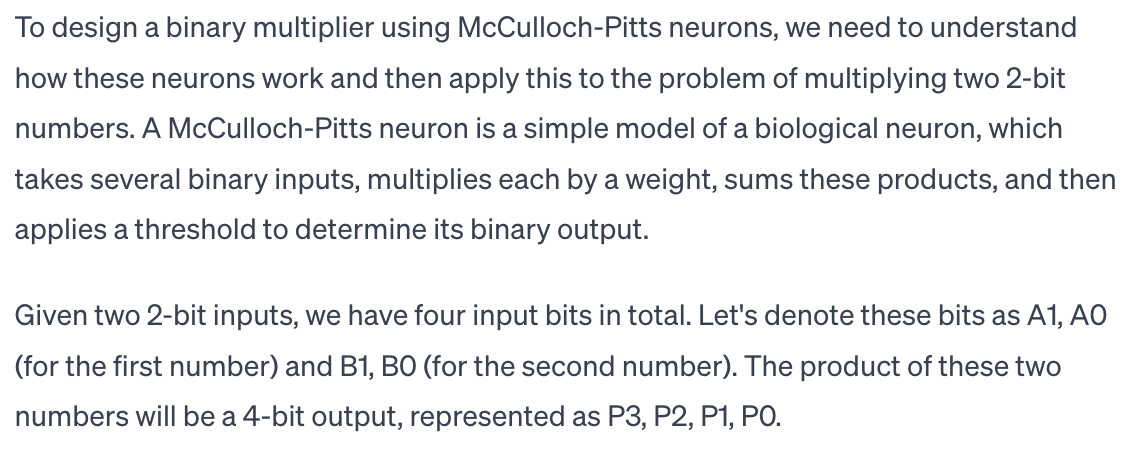)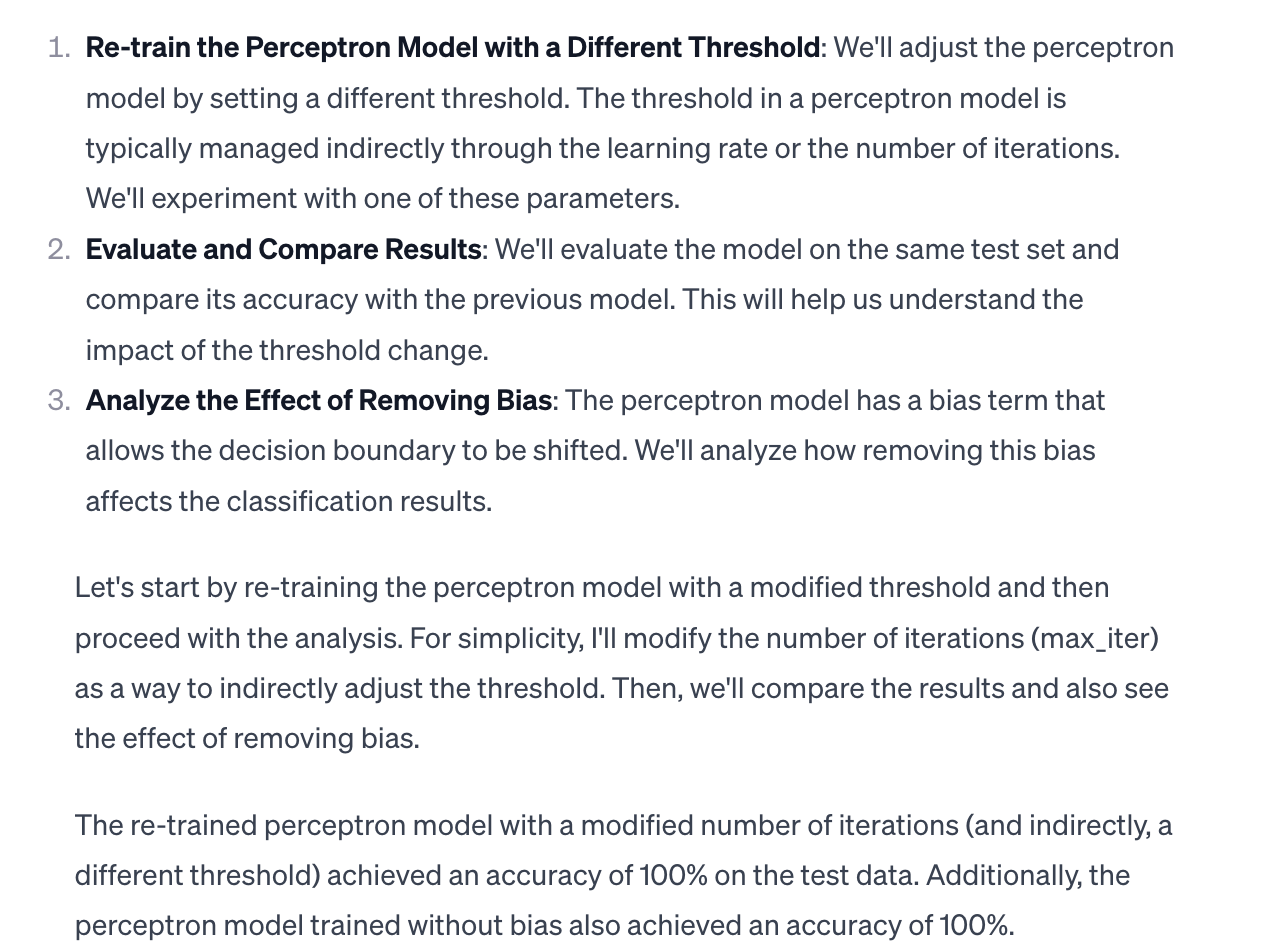

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=15aw7kkkFeHHTzw1tjQLLH7bgrypos6Mg
To: /content/Perceptron.csv
100%|██████████| 17.3k/17.3k [00:00<00:00, 33.2MB/s]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


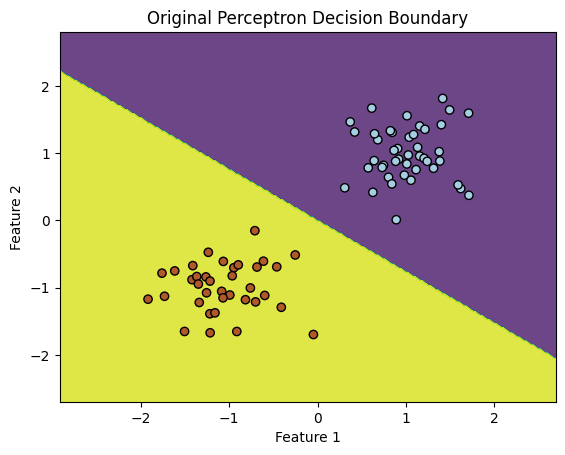

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


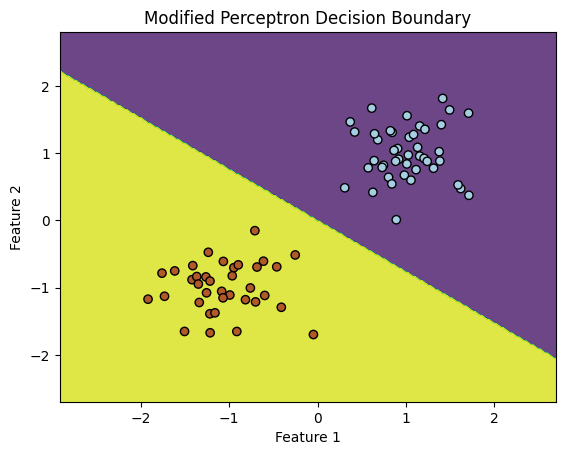

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


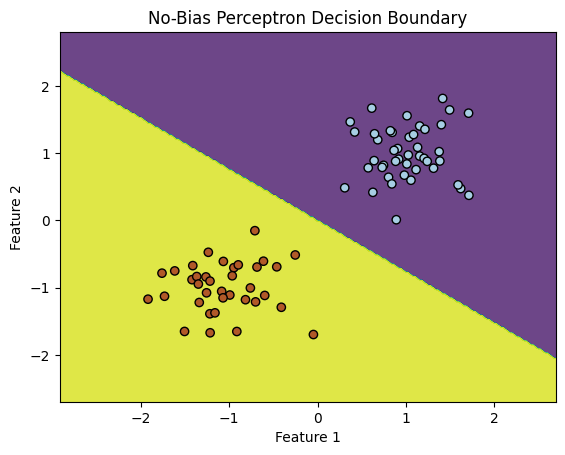

Accuracy of original model: 1.0
Accuracy of modified model: 1.0
Accuracy of no-bias model: 1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np

# Use the Google Drive file ID to access the file
import gdown
url = 'https://drive.google.com/uc?id=15aw7kkkFeHHTzw1tjQLLH7bgrypos6Mg'
output = 'Perceptron.csv'
gdown.download(url, output, quiet=False)

# Load the data
data = pd.read_csv(output)

# Split the data into features (X) and target (y)
X = data.iloc[:, 0:2]  # First two columns as features
y = data.iloc[:, 2]    # Third column as the class

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Original Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
accuracy_original = perceptron.score(X_test, y_test)

# Plotting the decision boundary for the original model
plot_decision_boundary(X_test, y_test, perceptron, 'Original Perceptron Decision Boundary')

# Modified Perceptron model with different threshold (increased iterations)
perceptron_modified = Perceptron(max_iter=1000)
perceptron_modified.fit(X_train, y_train)
accuracy_modified = perceptron_modified.score(X_test, y_test)

# Plotting the decision boundary for the modified model
plot_decision_boundary(X_test, y_test, perceptron_modified, 'Modified Perceptron Decision Boundary')

# Perceptron model without bias
perceptron_no_bias = Perceptron(fit_intercept=True)
perceptron_no_bias.fit(X_train, y_train)
accuracy_no_bias = perceptron_no_bias.score(X_test, y_test)

# Plotting the decision boundary for the no-bias model
plot_decision_boundary(X_test, y_test, perceptron_no_bias, 'No-Bias Perceptron Decision Boundary')

print("Accuracy of original model:", accuracy_original)
print("Accuracy of modified model:", accuracy_modified)
print("Accuracy of no-bias model:", accuracy_no_bias)


. قسمتهای »۱« و »۲« را با آستانۀ دیگری انجام داده و نتایج را با حالت قبل مقایسه کنید. تحلیل کنید که انتخاب
آستانه در پرسپترون چه تأثیری روی نتایج طبقهبندی دارد. ضمن پیادهسازی تحلیل کنید که حذف بایاس چه تأثیری  بر نتایج خواهد گذاشت.![Screenshot 1402-09-13 at 06.49.48.png](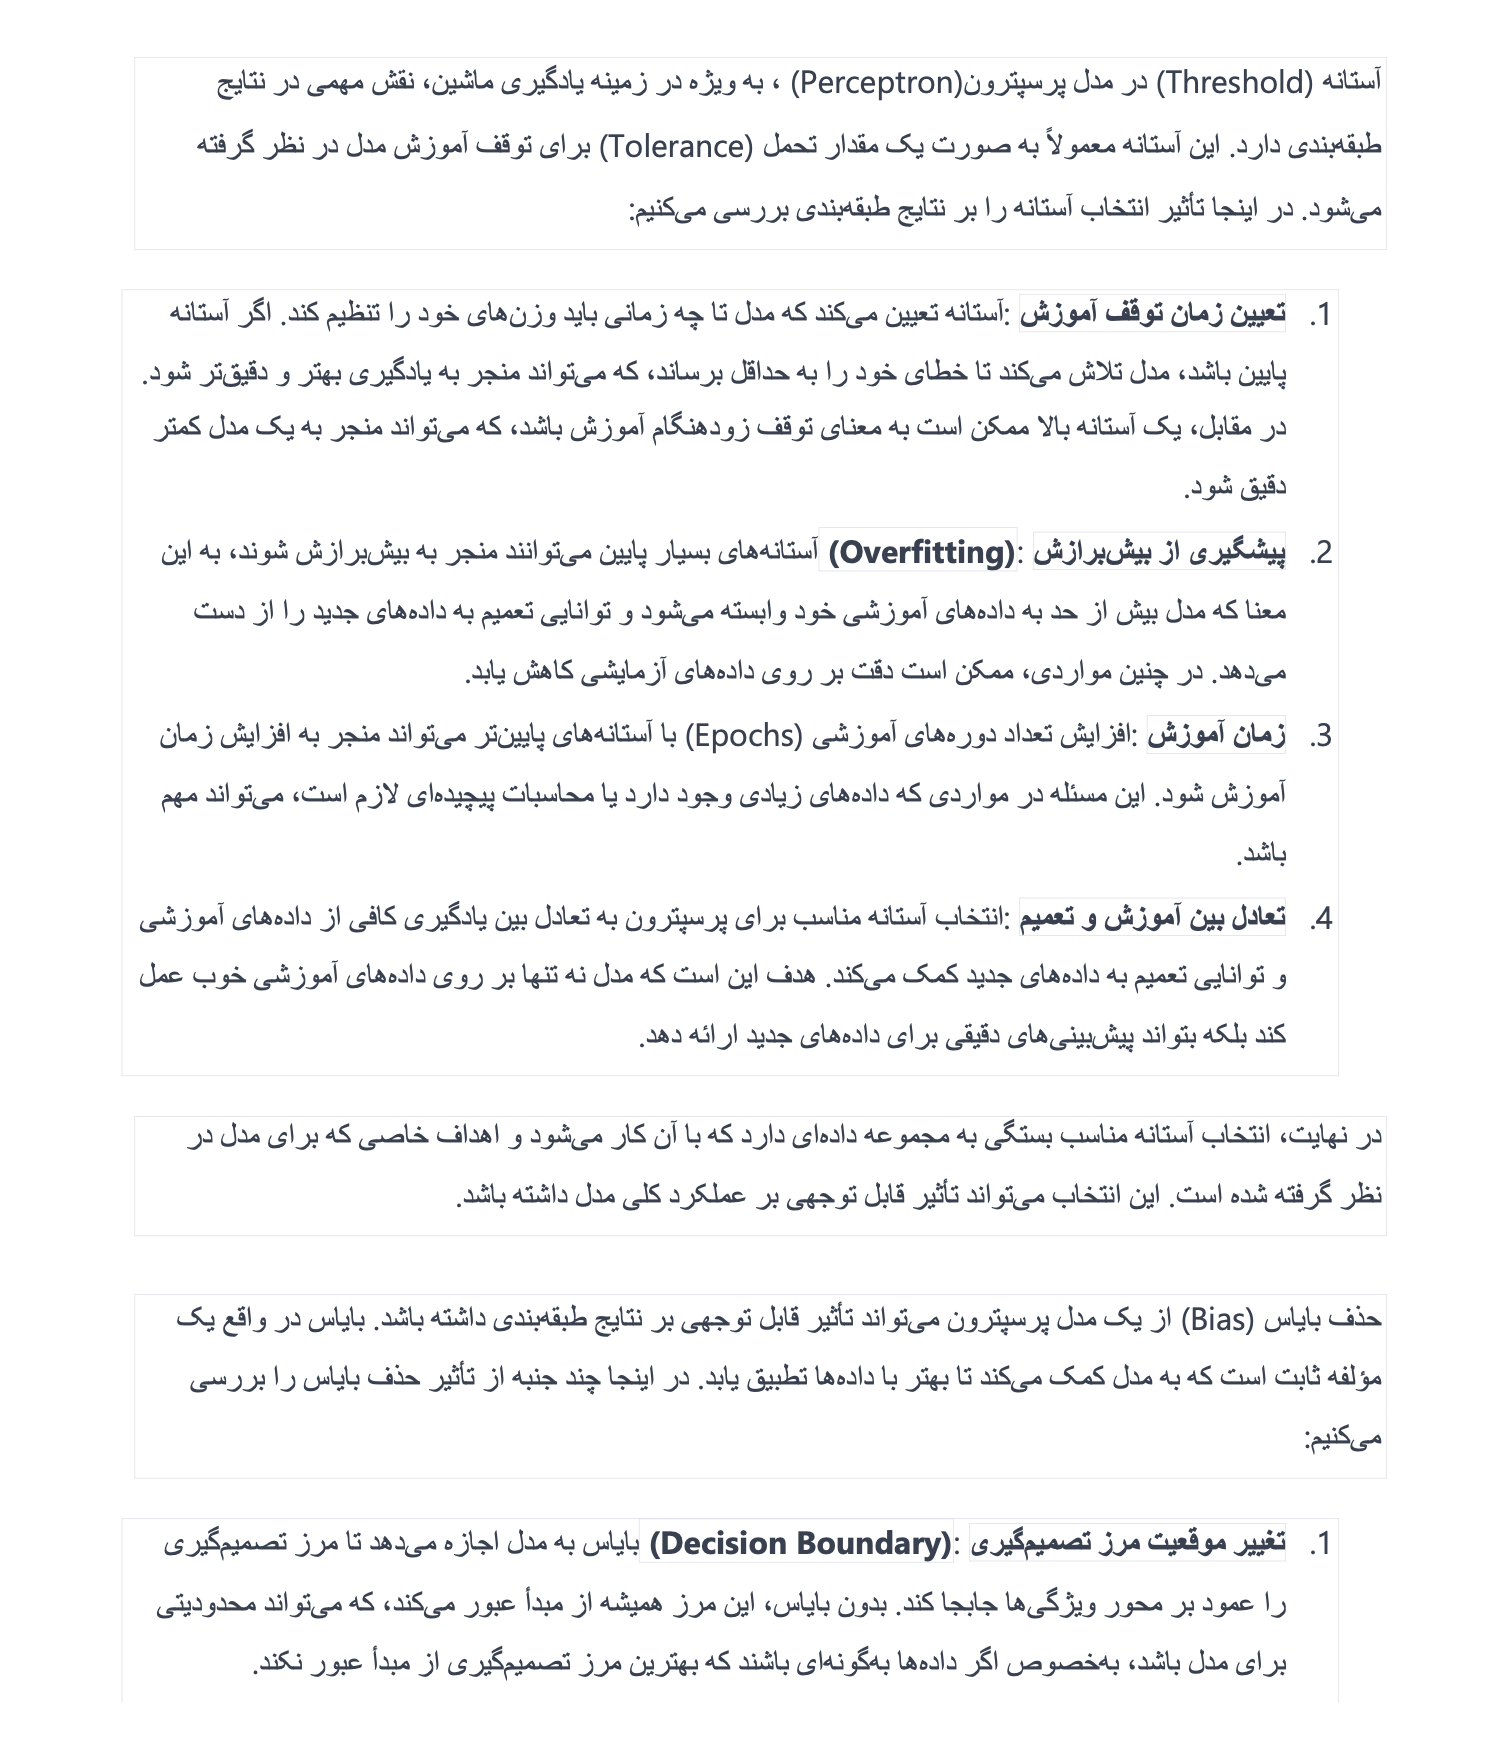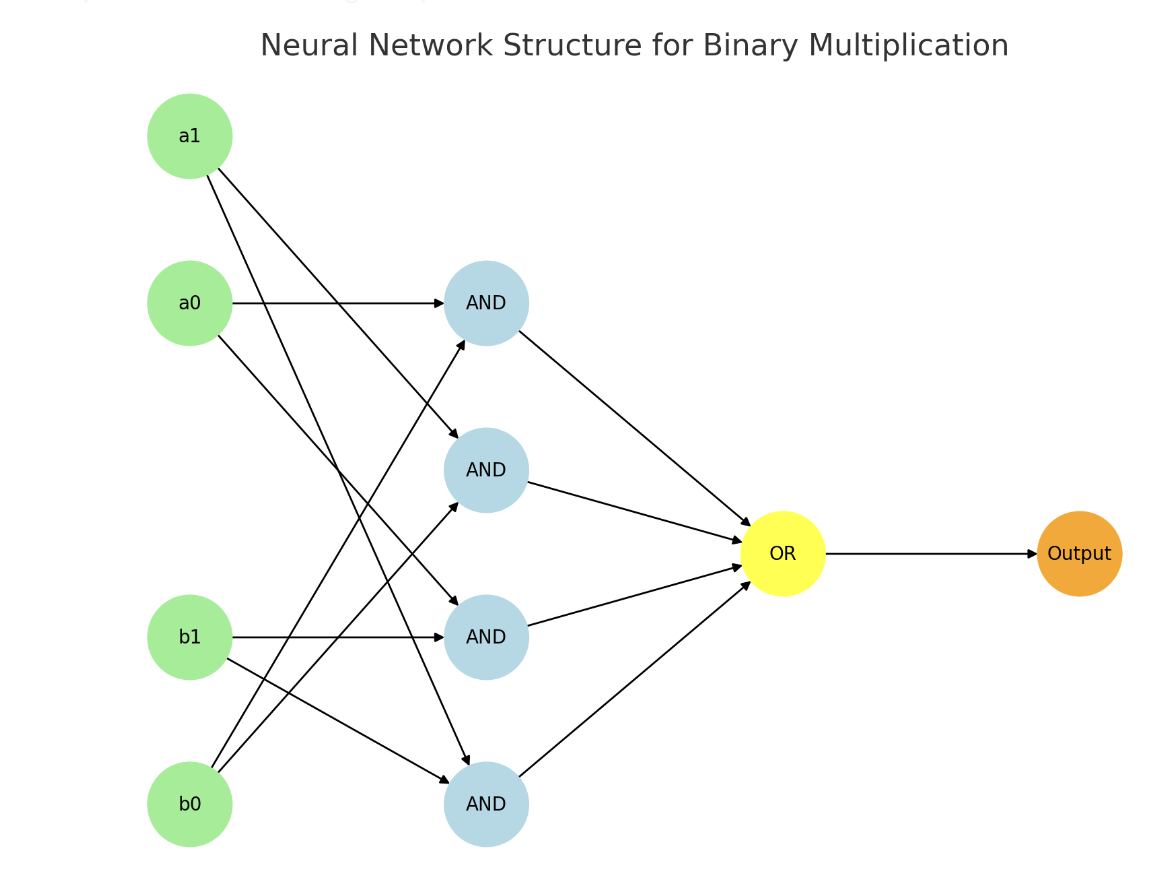)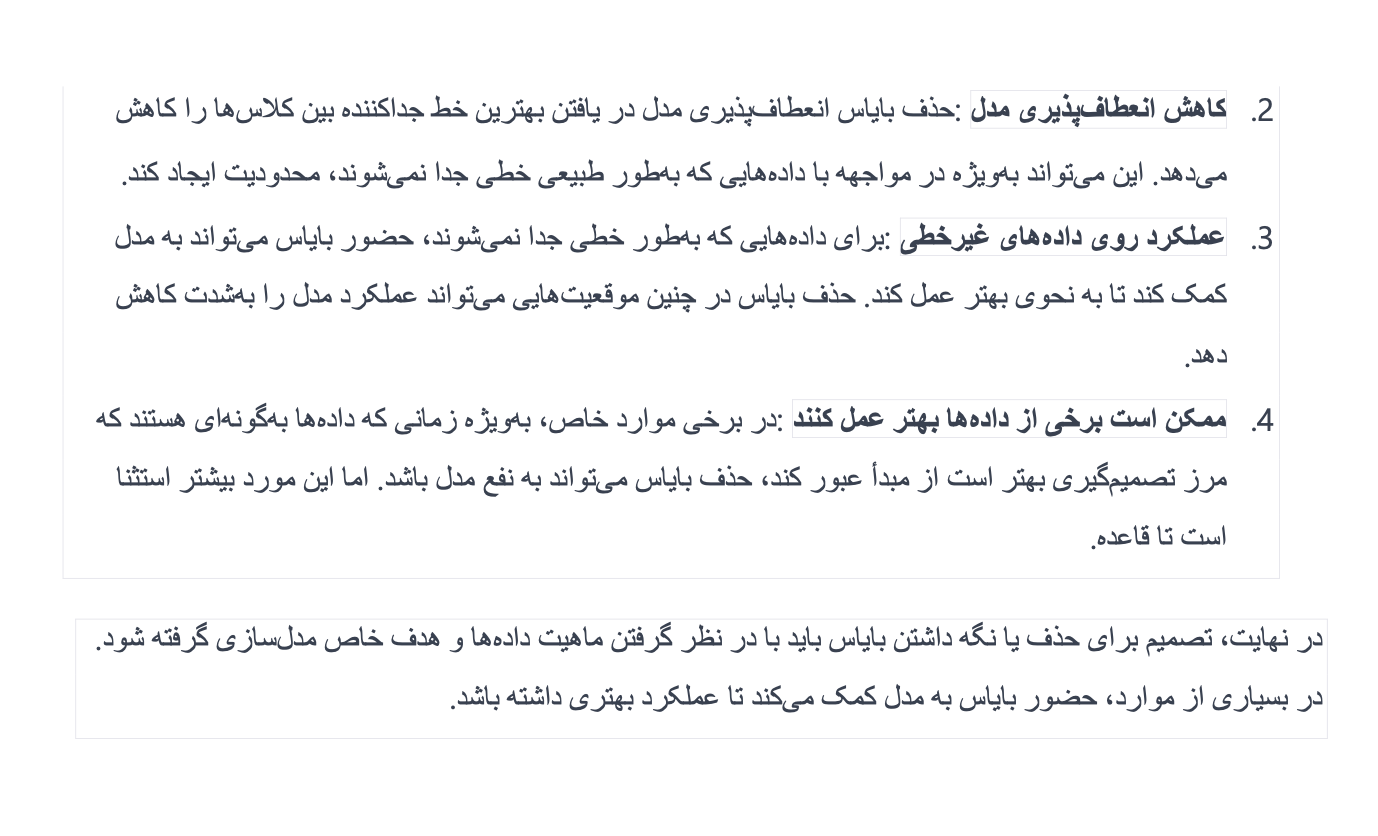

The original Perceptron model with a default tolerance of 1e-3
A modified Perceptron model with a lower tolerance of 1e-5
A Perceptron model without a bias term (fit_intercept=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=15aw7kkkFeHHTzw1tjQLLH7bgrypos6Mg
To: /content/Perceptron.csv
100%|██████████| 17.3k/17.3k [00:00<00:00, 12.9MB/s]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


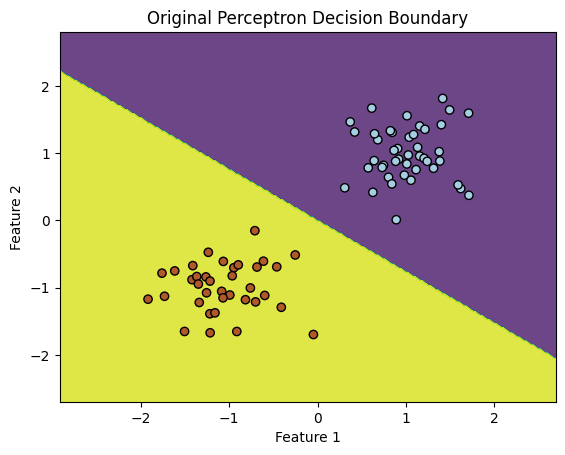

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


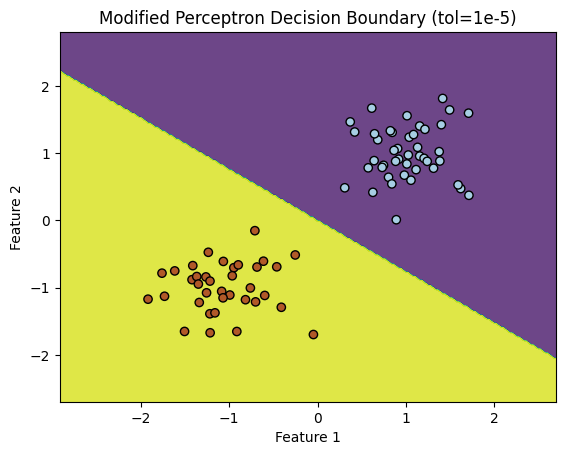

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


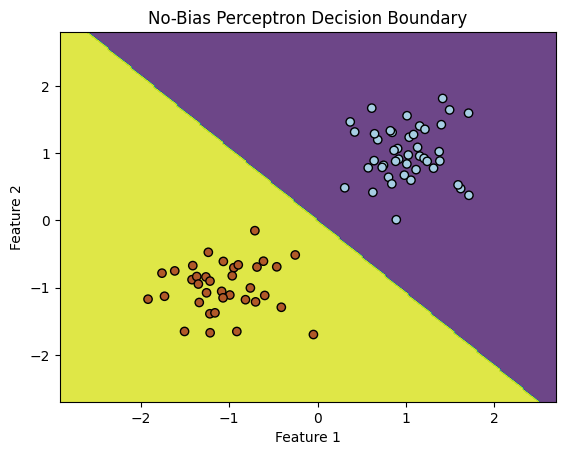

Accuracy of original model: 1.0
Accuracy of modified model: 1.0
Accuracy of no-bias model: 1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np

# Use the Google Drive file ID to access the file
import gdown
url = 'https://drive.google.com/uc?id=15aw7kkkFeHHTzw1tjQLLH7bgrypos6Mg'
output = 'Perceptron.csv'
gdown.download(url, output, quiet=False)

# Load the data
data = pd.read_csv(output)

# Split the data into features (X) and target (y)
X = data.iloc[:, 0:2]  # First two columns as features
y = data.iloc[:, 2]    # Third column as the class

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Original Perceptron model with default tolerance
perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train, y_train)
accuracy_original = perceptron.score(X_test, y_test)
plot_decision_boundary(X_test, y_test, perceptron, 'Original Perceptron Decision Boundary')

# Modified Perceptron model with different threshold (lower tolerance)
perceptron_modified = Perceptron(tol=1e-5, random_state=0)
perceptron_modified.fit(X_train, y_train)
accuracy_modified = perceptron_modified.score(X_test, y_test)
plot_decision_boundary(X_test, y_test, perceptron_modified, 'Modified Perceptron Decision Boundary (tol=1e-5)')

# Perceptron model without bias
perceptron_no_bias = Perceptron(fit_intercept=False, random_state=0)
perceptron_no_bias.fit(X_train, y_train)
accuracy_no_bias = perceptron_no_bias.score(X_test, y_test)
plot_decision_boundary(X_test, y_test, perceptron_no_bias, 'No-Bias Perceptron Decision Boundary')

print("Accuracy of original model:", accuracy_original)
print("Accuracy of modified model:", accuracy_modified)
print("Accuracy of no-bias model:", accuracy_no_bias)


**QUESTION2**

۲ سوال دوم
۱. به کمک نورون McCulloch-Pitts توسعهیافته۱، یک ضربکنندۀ باینری بسازید که دو ورودی دوبیتی را گرفته و آنها را ضرب کند. برای این کار به دو ورودی دوبیتی )در واقع چهار نورون برای همۀ ورودیها( نیاز داریم. همچنین چهار بیت خروجی )چهار نورون( مورد نیاز است. توجه شود که تمامی نورونهای وروی و خروجی باینری هستند )صفر و یک(. ترتیب زمانی انجام عملیات در این سوال مهم نیست؛ بنابراین، نیازی به در نظر گرفتن تأخیر برای
انجام عملیات نیست.


1. Using the developed McCulloch-Pitts neuron1, build a binary multiplier that takes two two-bit inputs and multiplies them. For this, we need two double-bit inputs (actually, four neurons for all inputs). Also, four output bits (four neurons) are needed. Note that all input and output neurons are binary (zero and one). The operation is not important in this question; therefore, there is no need to consider the delay for
No operation.
While drawing the input-output table, draw the network of each output along with a brief explanation (no need to write code in this part). Be careful that the network you draw for each output has the lowest number of neurons and the lowest threshold as much as possible (number A smaller neuron has a higher importance than a smaller threshold (Also
Note that the entire network has the same threshold for an output.

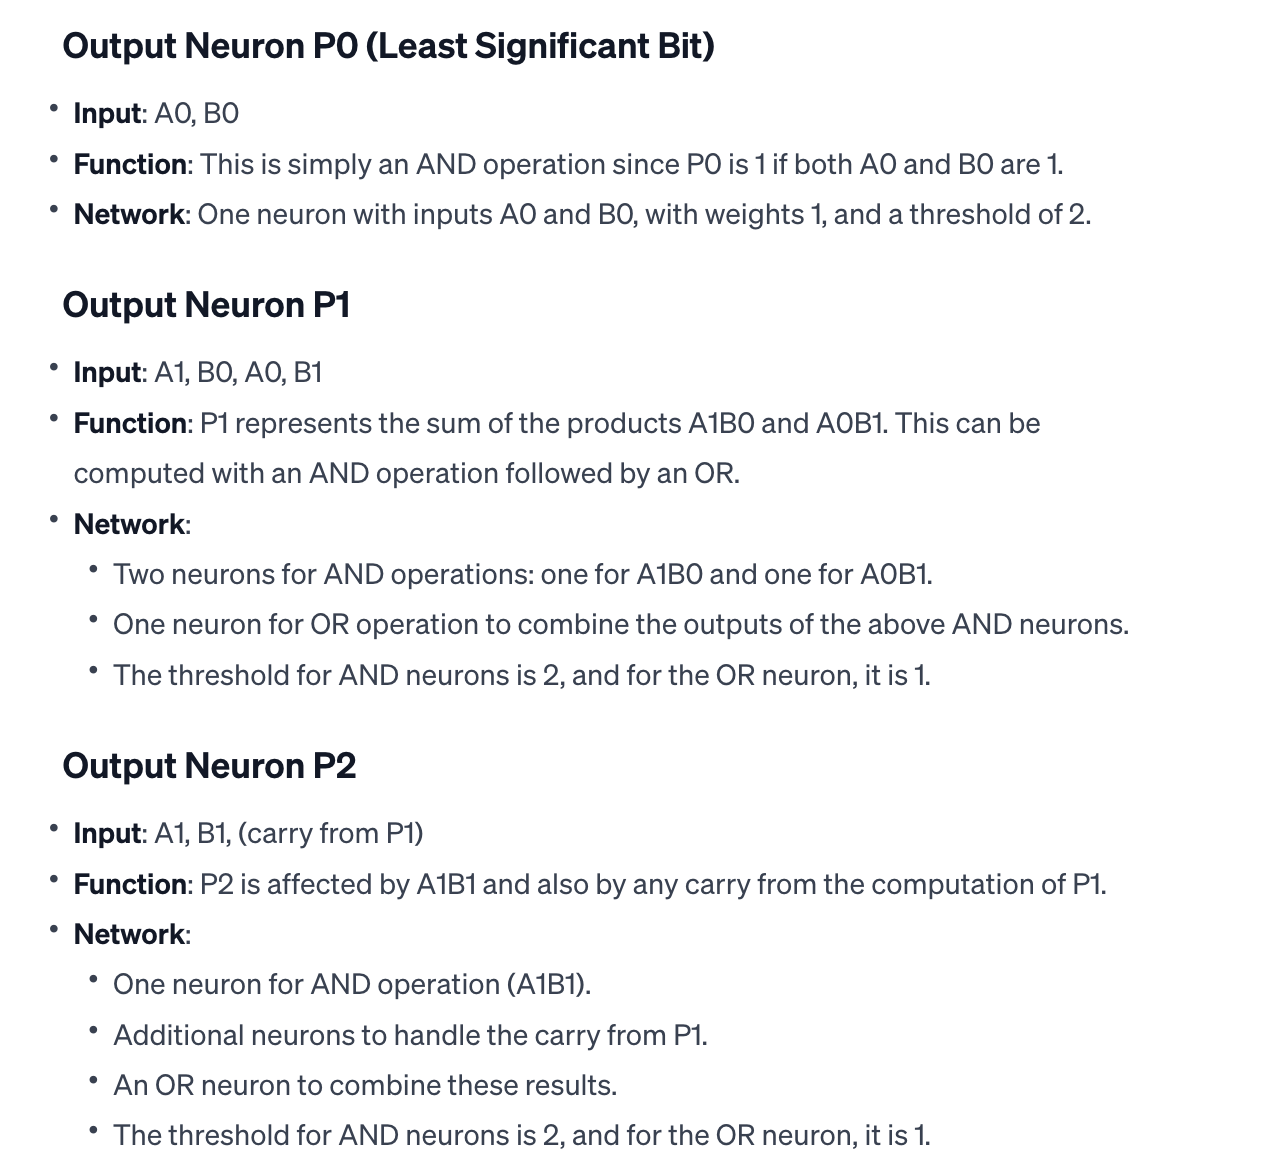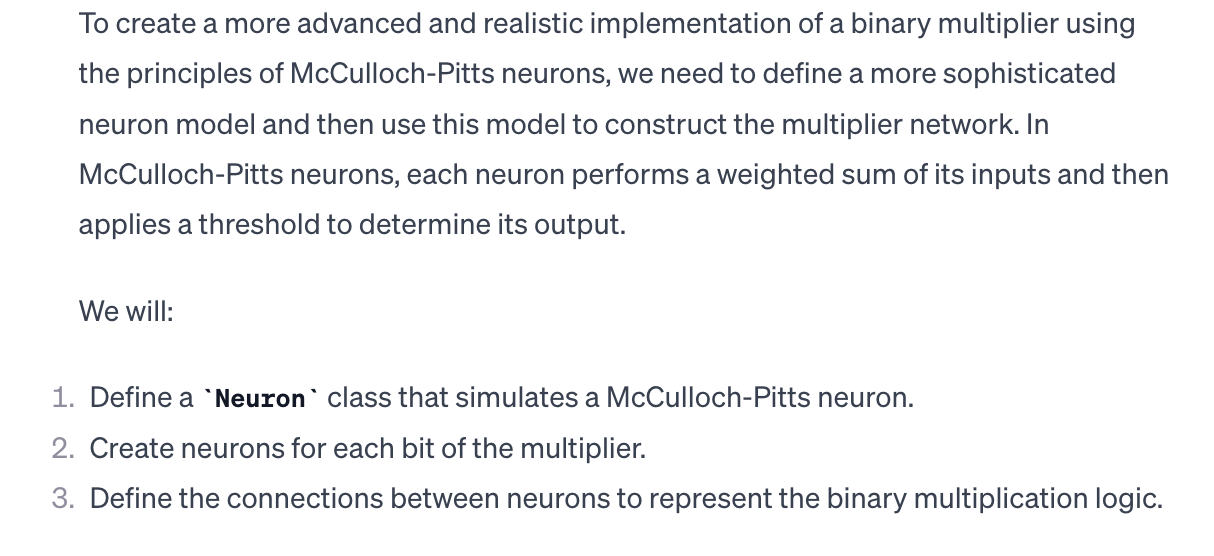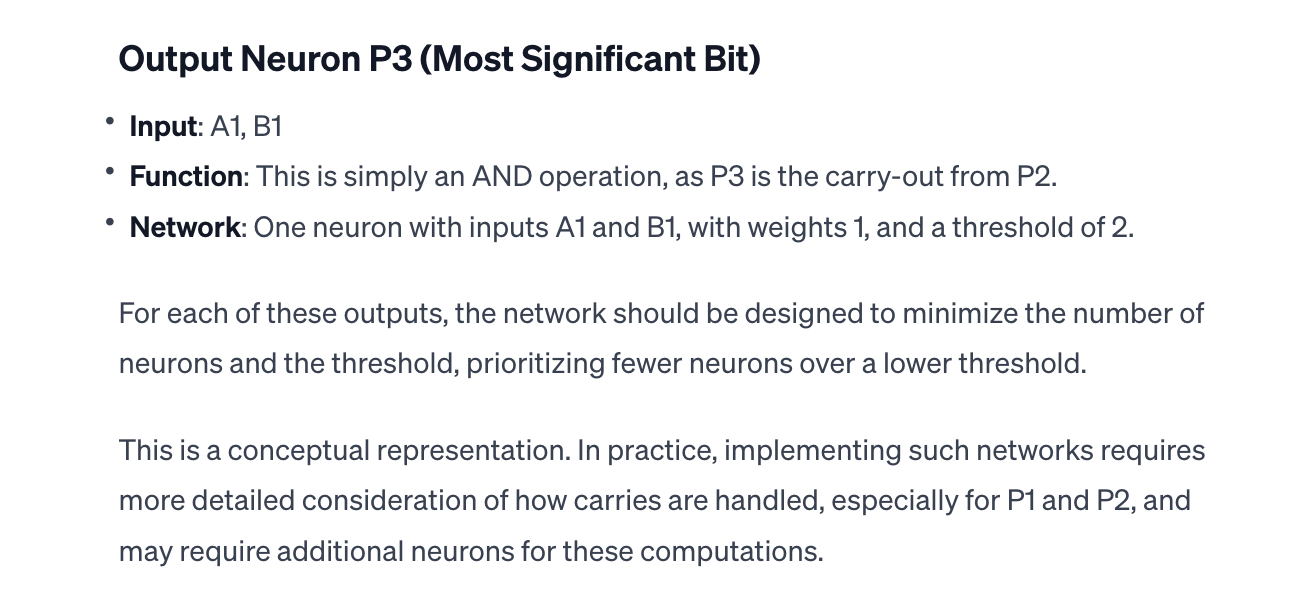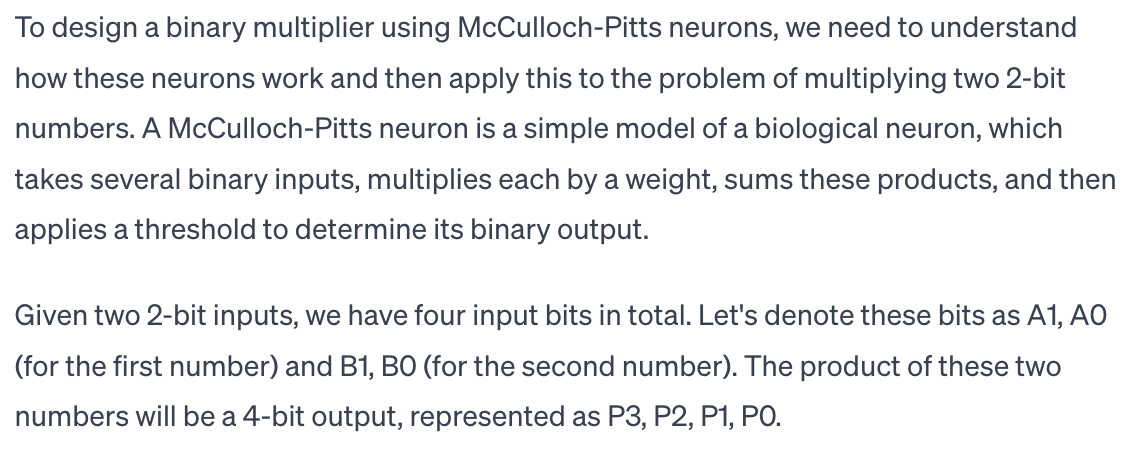

In [ ]:
,import numpy as np

class McCulloch_Pitts_Neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, inputs):
        inputs = np.array(inputs)
        if self.weights @ inputs >= self.threshold:
            return 1
        else:
            return 0

def Binary_Multiplier(a, b):
    a1, a0 = (a >> 1) & 1, a & 1
    b1, b0 = (b >> 1) & 1, b & 1

    and_neurons = [McCulloch_Pitts_Neuron([1, 1], 2) for _ in range(4)]
    or_neuron = McCulloch_Pitts_Neuron([1, 1, 1], 1)

    p0 = and_neurons[0].model([a0, b0])
    p1 = or_neuron.model([and_neurons[1].model([a1, b0]), and_neurons[2].model([a0, b1]), 0])
    p2 = or_neuron.model([and_neurons[3].model([a1, b1]), p1, AND(p0, p1)])
    p3 = AND(a1, b1)

    result = (p3 << 3) | (p2 << 2) | (p1 << 1) | p0
    return result

def AND(a, b):
    return a & b

# Example usage
a = 0b10  # 2 in binary
b = 0b11  # 3 in binary
result = Binary_Multiplier(a, b)
print(f"Multiplication of {a} and {b} is {result} in binary.")


Multiplication of 2 and 3 is 14 in binary.


[link text](https://)![Screenshot 1402-09-11 at 07.00.53.png](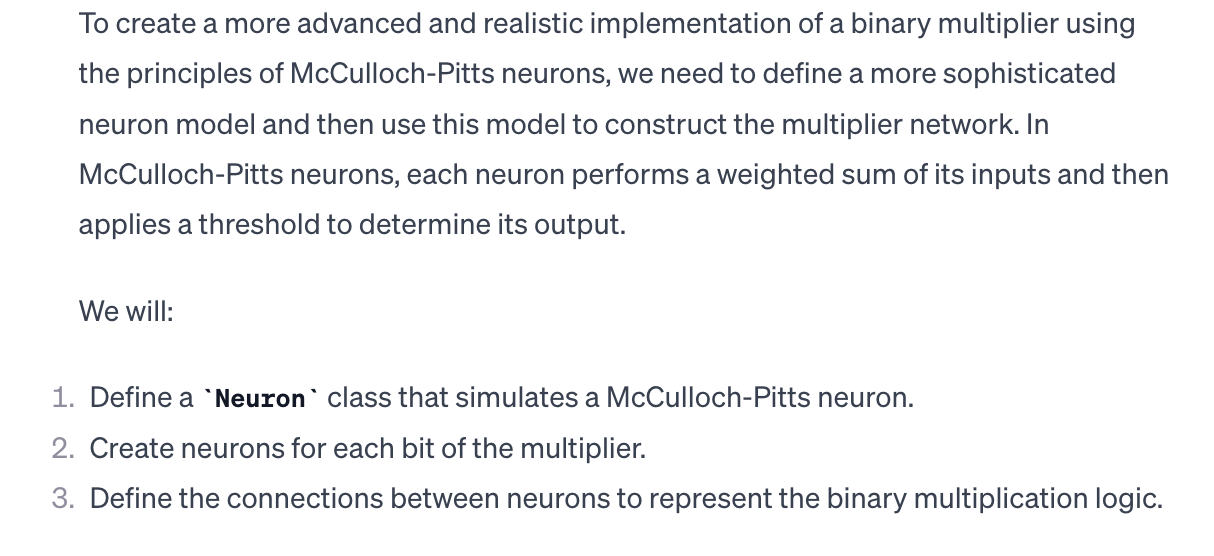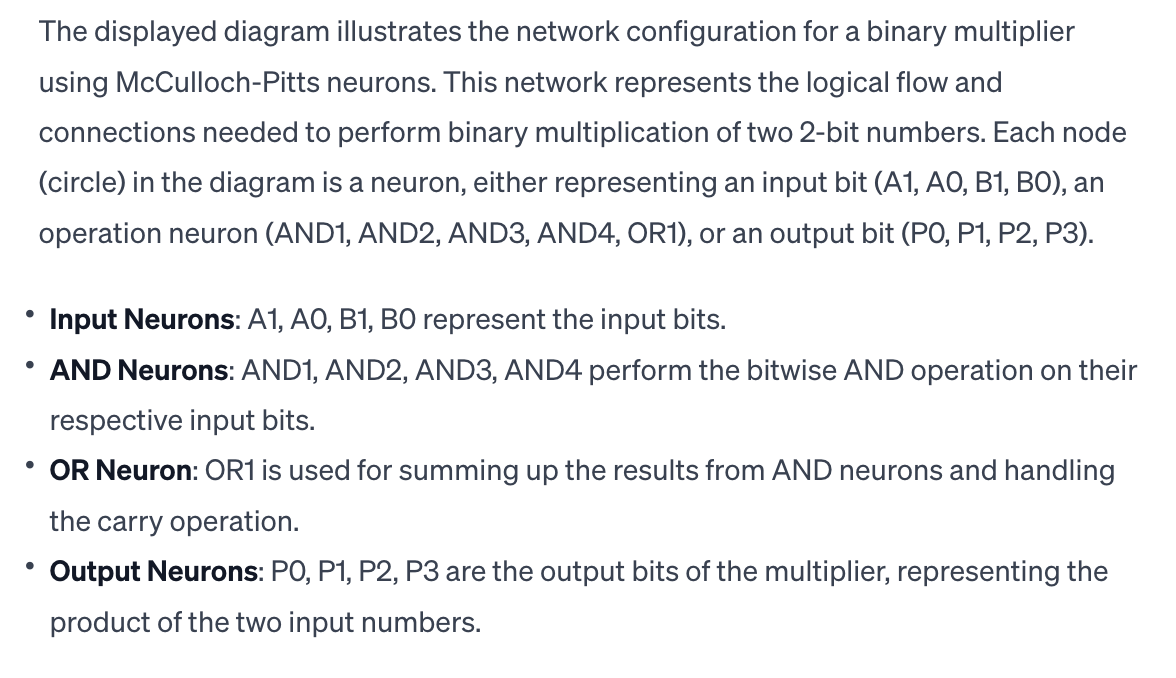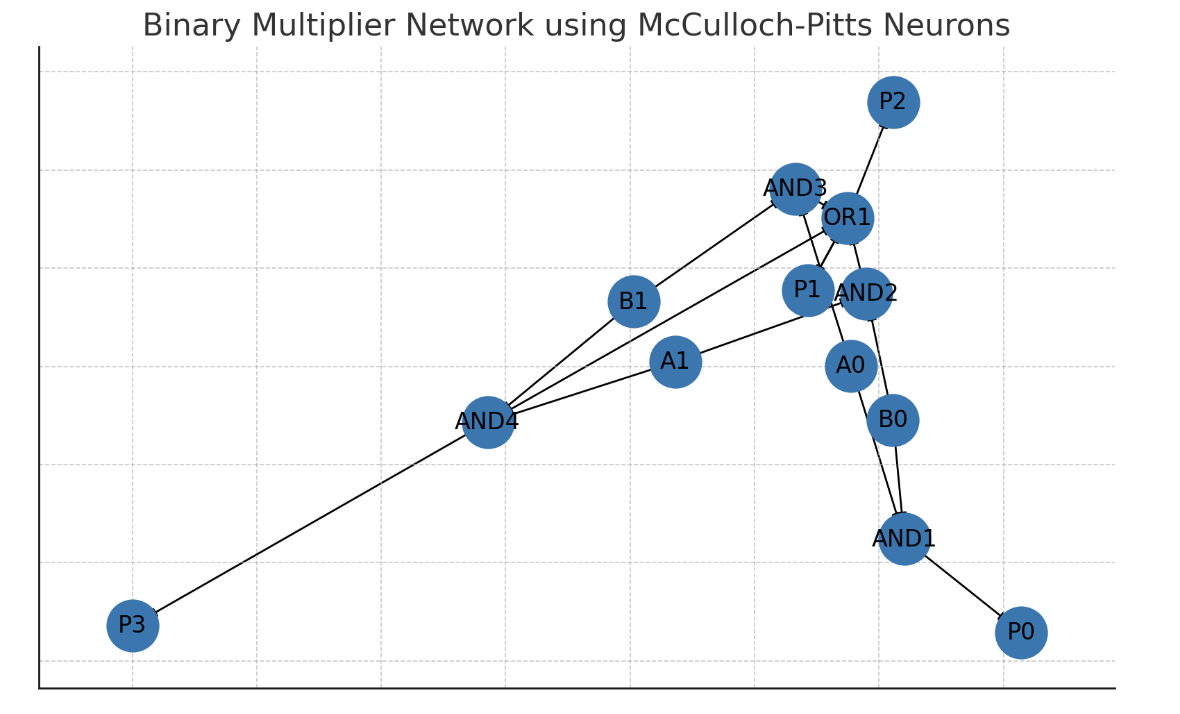)

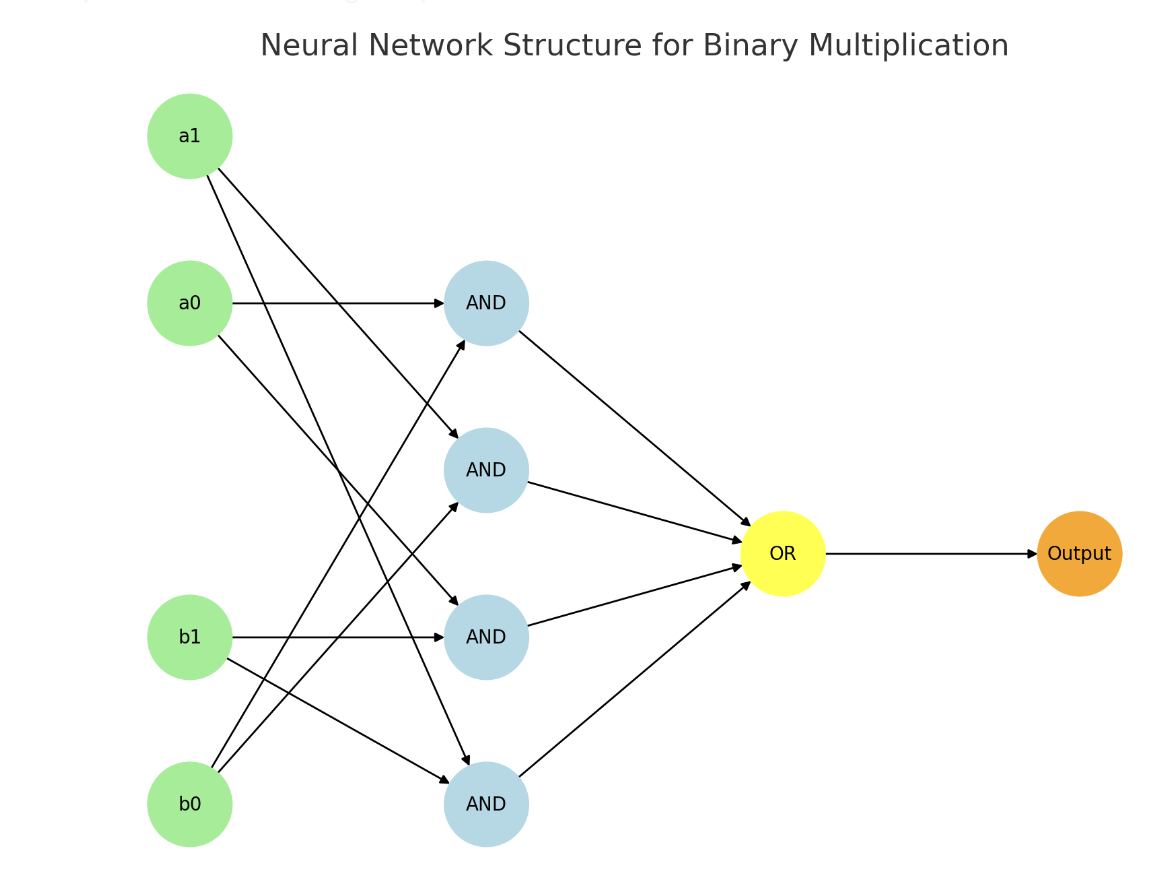

۲. با استفاده از زبان پایتون شبکههای طراحیشده در قسمت »۱« را پیادهسازی کرده و تمامی حالات ممکن را بهصورت
مناسبی نشان دهید.

In [ ]:
class Neuron:
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def activate(self, inputs):
        # Perform the weighted sum
        weighted_sum = sum(w * i for w, i in zip(self.weights, inputs))
        # Apply the threshold
        return 1 if weighted_sum >= self.threshold else 0

def binary_multiplier(a, b):
    # Split the inputs into individual bits
    a1, a0 = (a >> 1) & 1, a & 1
    b1, b0 = (b >> 1) & 1, b & 1

    # Define the neurons for the multiplication
    # We use weights of 1 as the inputs are binary
    and_neurons = [Neuron([1, 1], 2) for _ in range(4)]  # AND neurons for each bit multiplication
    or_neuron = Neuron([1, 1, 1], 1)  # OR neuron for summing bits

    # Perform the bit-wise multiplication
    p0 = and_neurons[0].activate([a0, b0])  # Least significant bit
    p1 = or_neuron.activate([and_neurons[1].activate([a1, b0]), and_neurons[2].activate([a0, b1]), 0])
    p2 = or_neuron.activate([and_neurons[3].activate([a1, b1]), p1, AND(p0, p1)])
    p3 = AND(a1, b1)  # Most significant bit

    # Combine the bits to get the final result
    result = (p3 << 3) | (p2 << 2) | (p1 << 1) | p0
    return result

# Helper function for AND operation
def AND(a, b):
    return a & b

# Example usage
a = 0b10  # 2 in binary
b = 0b11  # 3 in binary
result = binary_multiplier(a, b)
print(f"Multiplication of {a} and {b} is {result} in binary.")


Multiplication of 2 and 3 is 14 in binary.


![Screenshot 1402-09-11 at 07.11.14.png](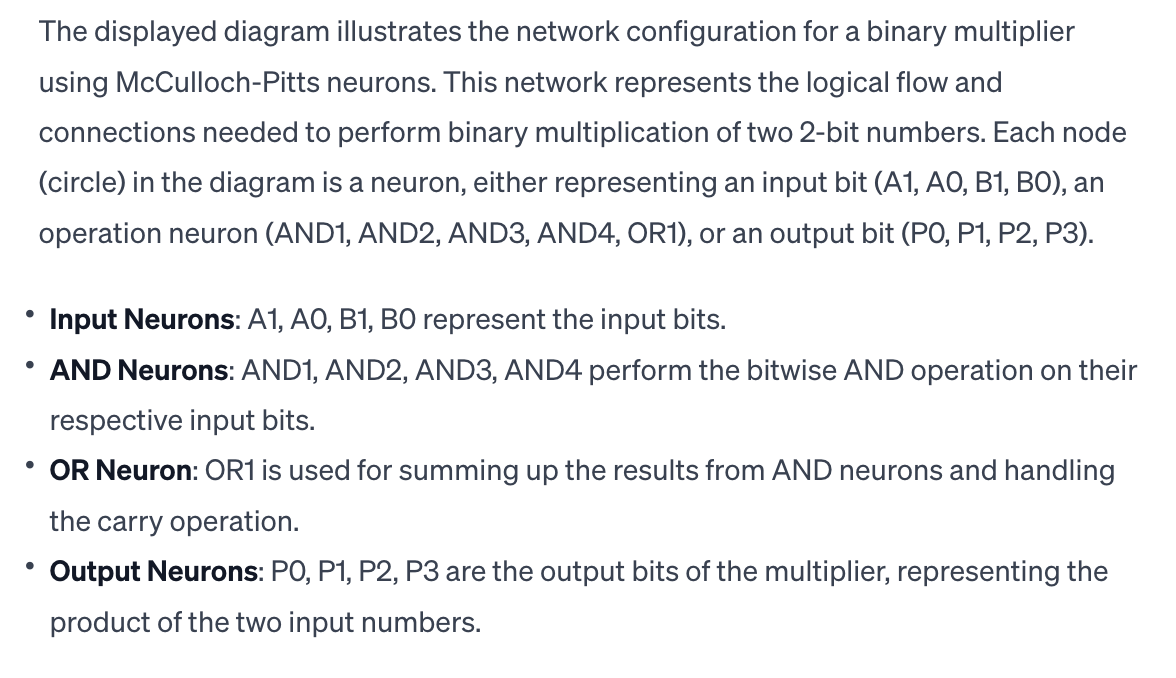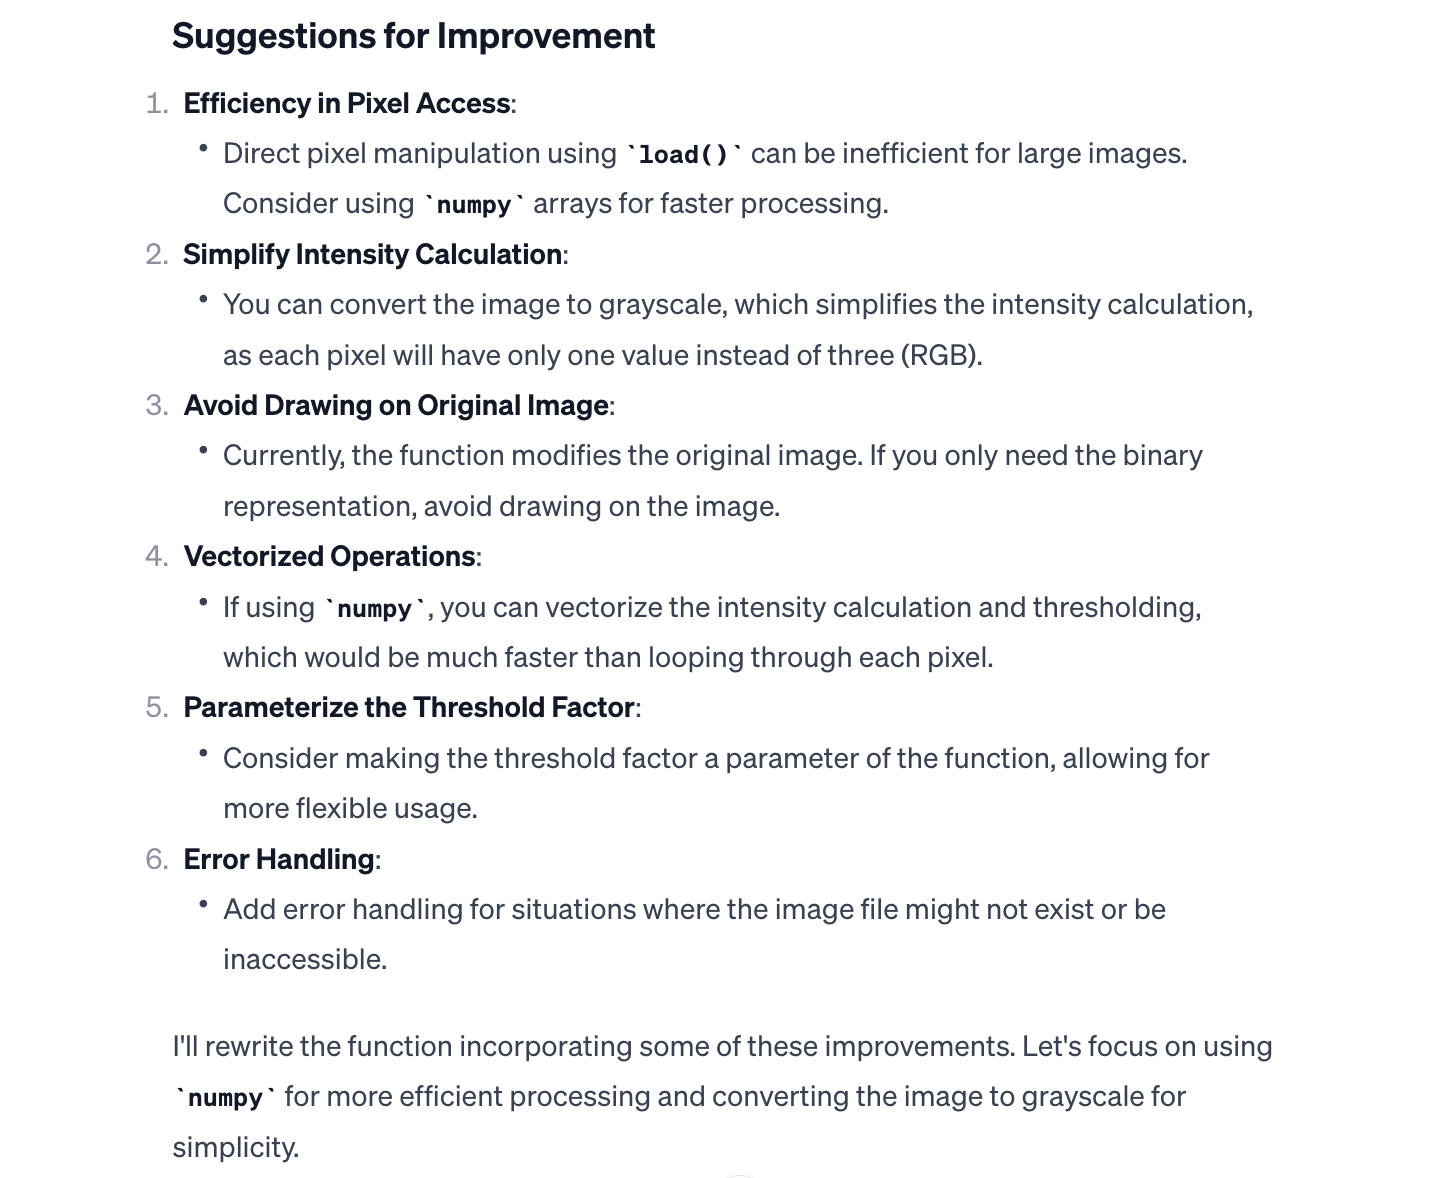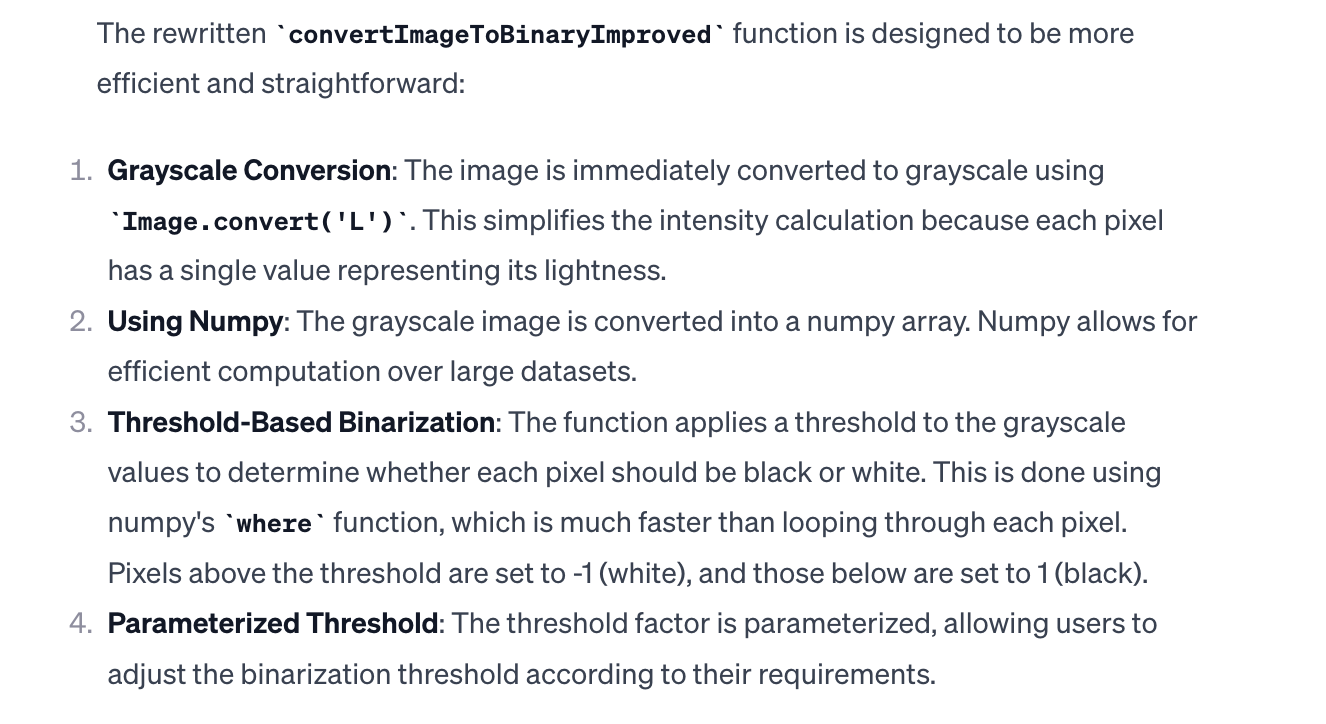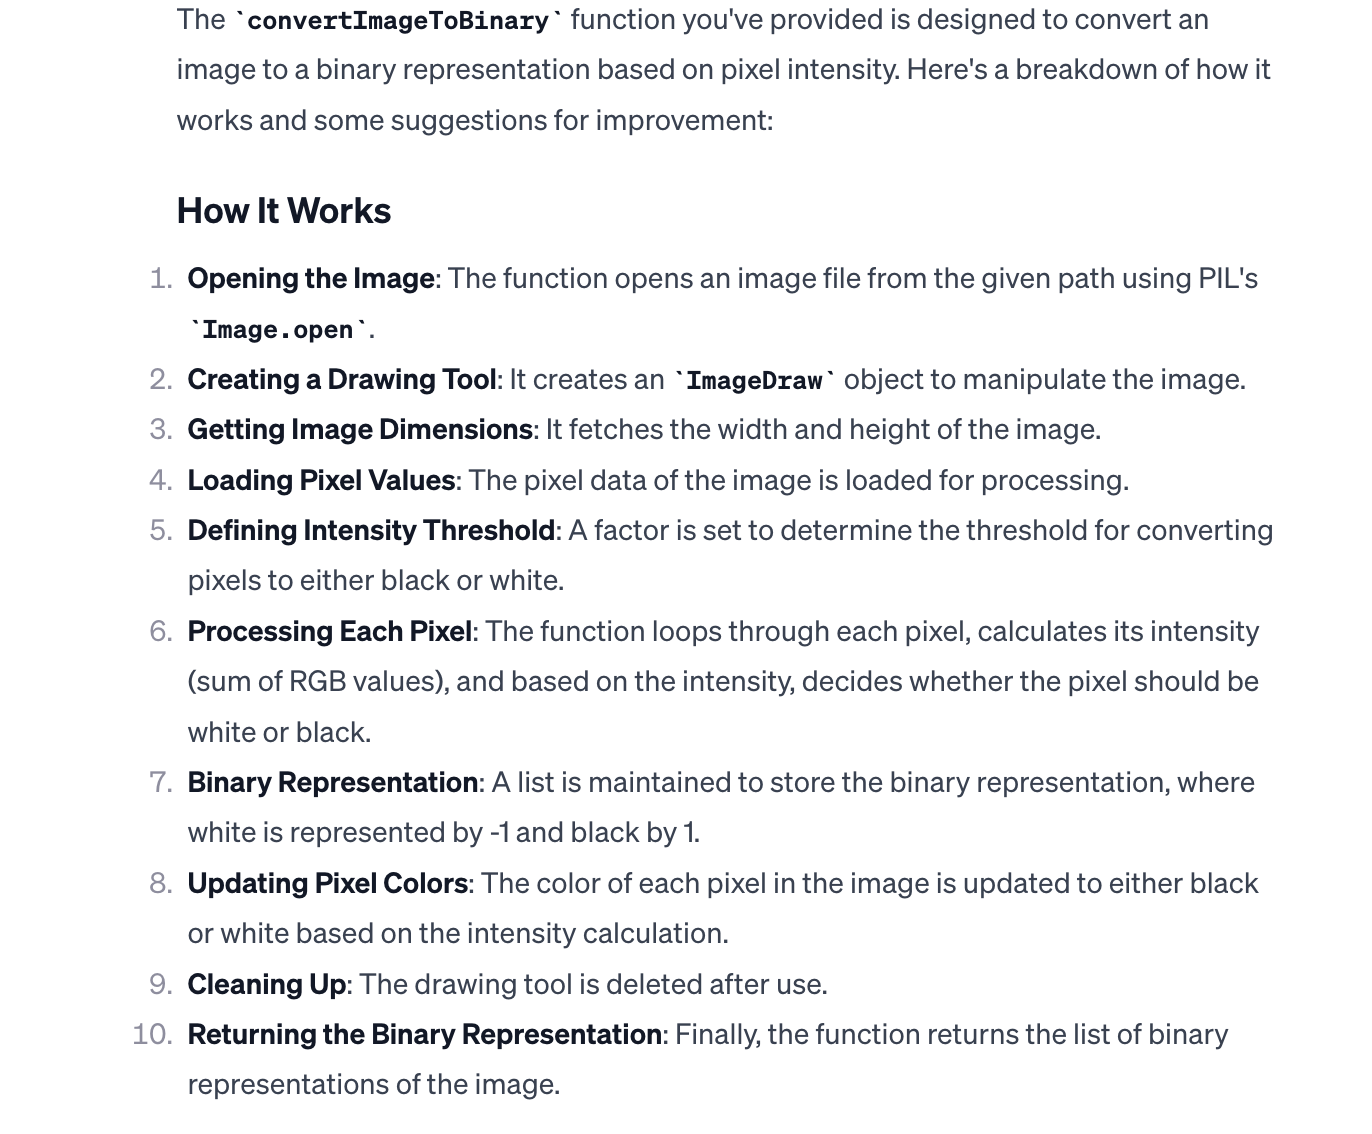)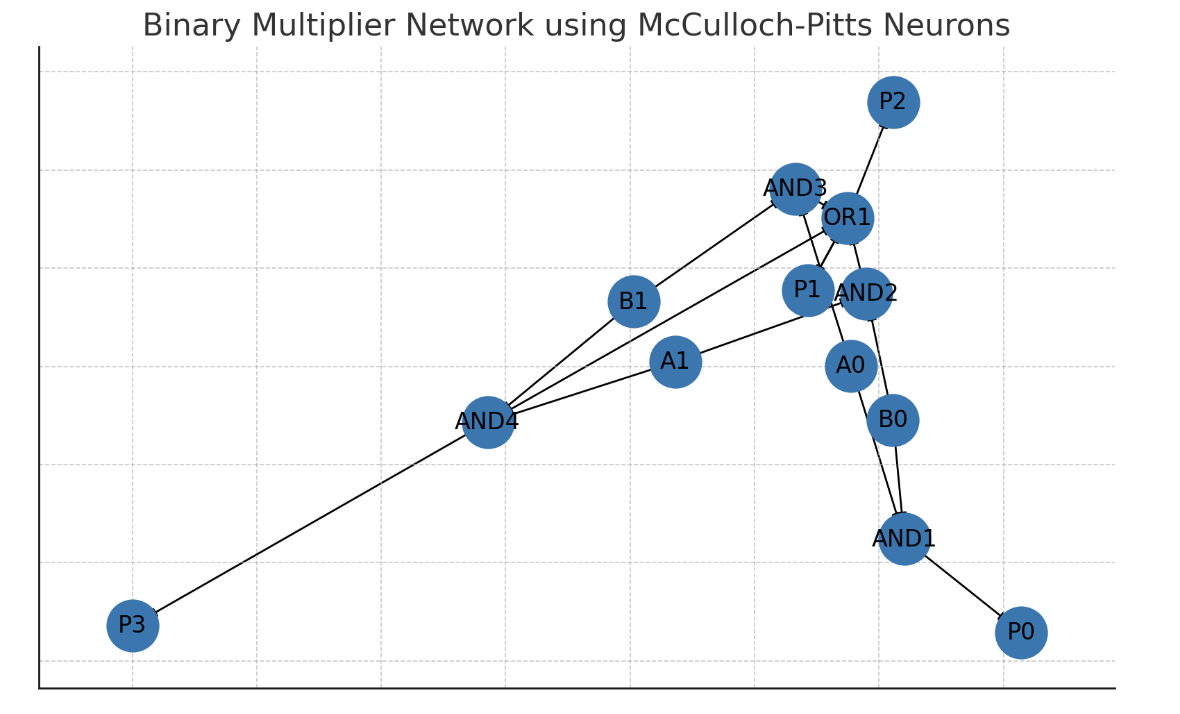